## Question One: Data Access

An often encountered step to data pre-processing usually involves querying data that exists within a relational database system. Typically such data may be transactional in nature, and as a result, it is optimized for a relational data model. While this format is critical for performance, efficient storage, and quick updates, it is often not suitable for data science work. In this next question, you will be asked to access data from a fictitious relational database and perform query operations to get it into a suitable format for analysis. The required output for this question is the correct SQL code and query results, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

You have been granted access to a database that contains two tables; `Order_Detail` and `Product_Detail` that are stored in a relational format.  `Order_Detail` contains transactional information and possesses the following schema:

#### Table Order_Detail Schema

> **invoice_id:** The unique id for each transaction.
>
> **invoice_line:** A unique id for each item sold with each transaction (ie, multiple items can be purchased with each invoice.)
>
> **store_id:** The store where transaction took place.
>
> **time_stamp:** The date of the purchase.
>
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **units:** The number of the products sold with the transaction (ie, you could purchase 2 of the same item.)
>
> **sales:** The gross sales for the item sold.
>
> **cogs:** The cost of the item sold (i.e. not the cost to the customer, but the cost to the business for the product.)

| invoice_id | invoice_line | store_id | time_stamp | product | units | sales  | cogs  | 
|------------|--------------|----------|------------|---------|-------|--------|-------| 
| 10000001   | 31215        | 3        | 9/3/17     | 3000    | 1     | 99.99  | 58.00 | 
| 10000001   | 31216        | 3        | 9/3/17     | 3354H   | 3     | 32.99  | 18.00 | 
| 10000002   | 91455        | 1        | 9/5/17     | 1234    | 2     | 24.99  | 20.00 | 
| 10000003   | 59943        | 2        | 9/5/17     | 3000    | 1     | 19.99  | 14.99 | 
| 10000004   | 95027        | 2        | 9/5/17     | 18518   | 1     | 9.99   | 3.00  | 
| 10000005   | 73994        | 2        | 9/5/17     | 12HA12  | 15    | 3.99   | 1.99  | 
| 10000006   | 98464        | 1        | 10/1/17    | wh30000 | 1     | 199.99 | 75.00 | 


#### Table Product_Detail Schema
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **cat_name:** The listed name for a given product category.
>
> **key_internal:** No documentation exists for this field. 

| product | cat_name | key_internal|
|---------|--------- |  ---------  |
| 3000    | WidgetA  |  17375273   |
| 3354H   | WidgetB  |  15477787   |
| 1234    | WidgetC  |  97845235   |
| 18518   | WidgetD  |  47813334   |
| 12HA12  | WidgetD  |  48573988   |
| wh30000 | WidgetE  |  00000000   |

Your task is to construct a single SQL query that returns the following results:

> Summarized total sales, total quantity sold, and total profit (which can be calculated as total sales less cogs) by the week number, store id, product category name.  It is important to note that in this business, the week begins on a *Tuesday*.  

*Hint:*  The week number is the week portion of a date value, from 0 to 53. 

*Bonus Question:* How would you use Python to access this data and perform these operations?

The following SQL code has been provided if you choose to create these tables in a test database.

```sql
--clean up existing tables
DROP TABLE IF EXISTS Order_Detail;
DROP TABLE IF EXISTS Product_Detail;

--create order table and populate records
CREATE TABLE IF NOT EXISTS Order_Detail (
    invoice_id INTEGER NOT NULL,
    invoice_line INTEGER NOT NULL,
    store_id INTEGER NOT NULL,
    time_stamp DATE NOT NULL,
    product VARCHAR(8) NOT NULL,
    units INTEGER NOT NULL,
    sales NUMERIC(7 , 2 ) NOT NULL,
    cogs NUMERIC(5 , 2 ) NOT NULL
);

INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31215,3,'2017/09/03','3000',1,99.99,58.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31216,3,'2017/09/03','3354H',3,32.99,18.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000002,91455,1,'2017/09/05','1234',2,24.99,20.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000003,59943,2,'2017/09/05','3000',1,19.99,14.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000004,95027,2,'2017/09/05','18518',1,9.99,3.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000005,73994,2,'2017/09/10','12HA12',15,3.99,1.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000006,98464,1,'2017/10/01','wh30000',1,199.99,75.00);

--create product table and populate records
CREATE TABLE IF NOT EXISTS Product_Detail (
    product VARCHAR(8) NOT NULL,
    cat_name VARCHAR(8) NOT NULL,
    key_interal VARCHAR(8) NOT NULL
);

INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3000','WidgetA','17375273');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3354H','WidgetB','15477787');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('1234','WidgetC','97845235');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('18518','WidgetD','47813334');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('12HA12','WidgetD','48573988');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('wh30000','WidgetE','00000000');
```

#Answer to question one goes here
1. MySQL <br>
Because MYSQL can't set first day of week on Tuesday, so I use default setting on WEEK function (Sunday is First day of week and range is 0~53) 

**Select sum(o.Sales) total_sale,sum(o.units)  total_quantity_sold, sum(o.Sales-o.cogs) total_profit, WEEK(time_stamp) week_number,o.store_id, p.cat_name
From Product_Detail p left join Order_Detail o on p.product=o.product
Group by o.store_id, p.cat_name,WEEK(time_stamp) **

<img src="picture/mysql.png">

In [2]:
#Bonus: Use Python to access this data and perform these operations

import pandas as pd

tableA = [(10000001,31215,3,'2017/09/03','3000',1,99.99,58.00),
         (10000001,31216,3,'2017/09/03','3354H',3,32.99,18.00),
           (10000002,91455,1,'2017/09/05','1234',2,24.99,20.00),
          (10000003,59943,2,'2017/09/05','3000',1,19.99,14.99),
           (10000004,95027,2,'2017/09/05','18518',1,9.99,3.00),
          (10000005,73994,2,'2017/09/10','12HA12',15,3.99,1.99),
          (10000006,98464,1,'2017/10/01','wh30000',1,199.99,75.00)]
labels = ['invoice_id', 'invoice_line','store_id','time_stamp','product','units','sales','cogs']
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [ ('3000','WidgetA','17375273'),
          ('3354H','WidgetB','15477787'),
           ('1234','WidgetC','97845235'),
           ('18518','WidgetD','47813334'),
           ('12HA12','WidgetD','48573988'),
         ('wh30000','WidgetE','00000000')]
labels = ['product','cat_name','key_interal']
dfB = pd.DataFrame.from_records(tableB, columns=labels)


In [33]:

import time
from time import gmtime, strftime
df_combin=dfA.join(dfB.set_index('product'), on='product')
df_combin['profit']=df_combin['sales']-df_combin['cogs']

df_combin['time_stamp'] = df_combin['time_stamp'].apply(lambda x: int(strftime("%U", time.strptime(x, "%Y/%m/%d"))))
df_combin.groupby(['time_stamp','store_id','cat_name']).sum()[['sales','units','profit']]



sales  units  profit
time_stamp store_id cat_name                       
36         1        WidgetC    24.99      2    4.99
           2        WidgetA    19.99      1    5.00
                    WidgetD     9.99      1    6.99
           3        WidgetA    99.99      1   41.99
                    WidgetB    32.99      3   14.99
37         2        WidgetD     3.99     15    2.00
40         1        WidgetE   199.99      1  124.99

## Question Two: Data Transformation

Another common task is to take data that may not be in a usable format and 'wrangle' it into a better representation.  This next question will test your ability to clean and order data.

You have been presented with two dataframes: 

#### Dataframe A: Product Attributes
This dataframe contains two columns; the first one is a unique product ID represented by an integer, the second is a string containing a collection of attributes assigned to that product.  

| product | tags                 |
|---------|----------------------|
| 100     | chocolate, sprinkles |
| 101     | chocolate, filled    |
| 102     | glazed               |


#### Dataframe B: Purchase History
The second dataframe contains two columns as well; the first one is a string that contains a customer name, the second is an integer that contains a product number.  The product IDs from column two are the same as the product IDs from column one of dataframe A.

| customer | product |
|----------|---------|
| A        | 100     |
| A        | 101     |
| B        | 101     |
| C        | 100     |
| C        | 102     |
| B        | 101     |
| A        | 100     |
| C        | 102     |

You are asked to create a dataframe matching this format, where the contents of the cells represent the count of occurrences of product attribute by customer.  

| customer | chocolate | sprinkles | filled | glazed |
|----------|-----------|-----------|--------|--------|
| A        | ?         | ?         | ?      | ?      |
| B        | ?         | ?         | ?      | ?      |
| C        | ?         | ?         | ?      | ?      |


After you have completed your code, evaluate it for performance bottlenecks and describe how you would improve the code.  

*Bonus Question:* If the two starting tables were in a relational database or Hadoop cluster and each had a 100 million rows, how might your approach change?

In [317]:
import pandas as pd

tableA = [(100, 'chocolate, sprinkles'),
         (101, 'chocolate, filled'),
         (102, 'glazed')]
labels = ['product', 'tags']
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [('A', 100),
           ('A', 101),
           ('B', 101),
           ('C', 100),
           ('C', 102),
           ('B', 101),
           ('A', 100),
           ('C', 102)]
labels = ['customer', 'product']
dfB = pd.DataFrame.from_records(tableB, columns=labels)

In [79]:
# #Answer to question two goes here
tag_list=dfA['tags'].str.split(',').tolist()
tag_set = set(i for l in lo for i in l)
for tag in tag_set:
    dfA[tag]=0
    dfA.loc[dfA['tags'].str.contains(tag),[tag]]=1

df_combin=dfA.join(dfB.set_index('product'), on='product')

df_combin = df_combin.drop(columns=['product','tags'])
df_combin.groupby('customer').sum()

,filled,sprinkles,chocolate,glazed
customer,,,,
A,1,2,3,0
B,2,0,2,0
C,0,1,1,2


#Bonus:If the two starting tables were in a relational database or Hadoop cluster and each had a 100 million rows, how might your approach change?

If two tables are stored in Hadoop, we can use MapReduce to speed up the query performance.
First, we can run MapReduce groupby operatoin in Purchase history table to group by customer and product.<img src="picture/groupby.png">
Then we can extract prodcut attribute by string split function then create new column from each product attribute. Then we can run MapReduce join operation between  Purchase history and Product Attributes when product ID is getting the same.

## Question Three: Hypothesis Testing
This question will test your statistical and reasoning abilities.  You have been asked to analyze the results of a randomized, controlled experiment on a fictitious website and provide a recommendation.  For this experiment, each visitor to the site is randomly exposed to one of four different product images; visitors are then tracked to see which ones make a purchase or not.  Based on the data provided, which version of the image should be selected to be presented to all visitors and why?

| image | visitors | purchases 
|----------|-----------|----------|
| A        | 21        | 3        | 
| B        | 180       | 30       | 
| C        | 250       | 50       | 
| D        | 100       | 15       | 

*Bonus Question:* How would your analysis change if the visitors and purchase counts numbered in the millions? 

#Answer to question three goes here

**1.Define Metric** <br>
Based on the data provided above, I define purchase rate(purchases/visitors) as my metric. And the purchase rate of each image is shown below:


| image | Purchase Rate | 
|----------|-----------|
| A        | 0.143        |
| B        | 0.167      |
| C        | 0.2       |
| D        | 0.15       |

**2.Design the experiment** <br>
I assume that C should be selected to be presented to all visitors,(because c got the highest purchase rate), and here is my alternative hypothesis (HA)
So the null hypothesis is c can’t be selected (H0)

So there are three hypothesis test we need to Analyze:

|  | H0 | HA|
|---------|--------- |  ---------  |
| C vs A    | Pc=Pa  |  Pc-Pa>0  |
| C vs B   | Pc=Pb  |  Pc-Pb>0  |
| C vs D    | Pc=Pd  |  Pc-Pd>0 |

*P is denoted by purchase rate, so Pc represents the purchase rate of C

**3.Analyze the experiment** <br>
First, check success-failure condition in each experiment:

|  | Success-Failure condition |
|---------|--------- |
| C vs A    | Fail  |  
| C vs B   | Successful  | 
| C vs D    | Successful  | 

Because the sample size of A is too small, the Success-Failure condition is fail (n*P >=10 & n*(1-p)>=10), so it can't be calculated by hypothesis test in z-distribution. So we drop up this experiment (C vs A).
Second, check the p-value in each experiment:

|  | p-value |
|---------|--------- | 
| C vs B   | 0.27  | 
| C vs D    | 0.22  | 

So if we use 5% to check how signifance level of p-values is, both experiment are fail to reject null hypothesis (p-value>5%)

**4.Conclusion**<br>
Based on the result of each experiment, none of them can be presented to all visitors. The main reason is the total number of visitor from each image is too small, which meas the statistical power is not enough to make a reasonable conclusion. Usually, over 80% of statistical power is good enough to analyze the hypothesis test.

**5.Next Step --Explore behind the experiment**<br>
1.Check the reason why sample size in each image varies a lot
2.Check each product is getting the same price a lot
3.Is image C the control group (Which get the most visitors)?




## Question Four: Forecasting

For this question, you will be provided with data related to the count of website sessions by day for the past one hundred days.  You are now asked to create a forecast for the next sixty days using this data.  

In [1]:
import pandas as pd
sessionData = {'date': ["1/1/17","1/2/17","1/3/17","1/4/17","1/5/17","1/6/17","1/7/17","1/8/17","1/9/17","1/10/17",
"1/11/17","1/12/17","1/13/17","1/14/17","1/15/17","1/16/17","1/17/17","1/18/17","1/19/17","1/20/17",
"1/21/17","1/22/17","1/23/17","1/24/17","1/25/17","1/26/17","1/27/17","1/28/17","1/29/17","1/30/17",
"1/31/17","2/1/17","2/2/17","2/3/17","2/4/17","2/5/17","2/6/17","2/7/17","2/8/17","2/9/17","2/10/17",
"2/11/17","2/12/17","2/13/17","2/14/17","2/15/17","2/16/17","2/17/17","2/18/17","2/19/17","2/20/17",
"2/21/17","2/22/17","2/23/17","2/24/17","2/25/17","2/26/17","2/27/17","2/28/17","3/1/17","3/2/17","3/3/17",
"3/4/17","3/5/17","3/6/17","3/7/17","3/8/17","3/9/17","3/10/17","3/11/17","3/12/17","3/13/17","3/14/17",
"3/15/17","3/16/17","3/17/17","3/18/17","3/19/17","3/20/17","3/21/17","3/22/17","3/23/17","3/24/17",
"3/25/17","3/26/17","3/27/17","3/28/17","3/29/17","3/30/17","3/31/17","4/1/17","4/2/17","4/3/17",
"4/4/17","4/5/17","4/6/17","4/7/17","4/8/17","4/9/17","4/10/17"],
     'sessions': [88215,88484,87877,86780,84622,84607,84362,84912,84367,85991,86562,86761,85735,85386,84023,
83504,83795,85127,84971,86433,88094,89120,89184,90188,88540,88693,88031,86601,87447,87716,87042,87039,
86197,84339,85095,84764,83386,82621,83256,82997,84614,84480,86006,86436,85711,84115,83612,84812,85036,
84844,83745,85598,84914,85813,86634,86995,88356,87731,89142,90383,90686,93692,93800,93502,93786,92292,
91104,90193,90341,89314,88861,88853,89992,90246,90968,89741,88718,88335,87898,87666,88600,90110,90401,
90370,90346,89691,90643,90489,91289,89290,88668,89804,88989,89976,88239,87444,86951,85434,85655,
85105]}

sessionsDf = pd.DataFrame(data = sessionData)

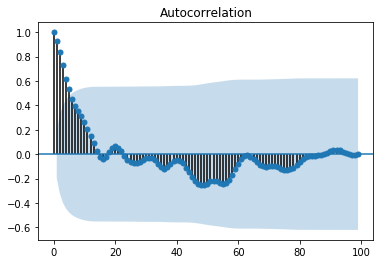

In [4]:

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sessionsDf)
pyplot.show()


In [194]:
#Answer to question four goes here

We will estimate the trend and seasonality in the series, then remove those from the series to get a stationary series. So statistical forecasting techniques (ARIMA) can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.



**1.Exploratory data analysis**

In [2]:
from datetime import datetime  
from datetime import timedelta  
from matplotlib import pyplot  as plt
from statsmodels.tsa.seasonal import seasonal_decompose

sessionsDf['date'] = pd.to_datetime(sessionsDf['date'])
sessionsDf.set_index('date', inplace=True)
sessionsDf['sessions'] = sessionsDf['sessions'].astype('float32')

/Users/YiChen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


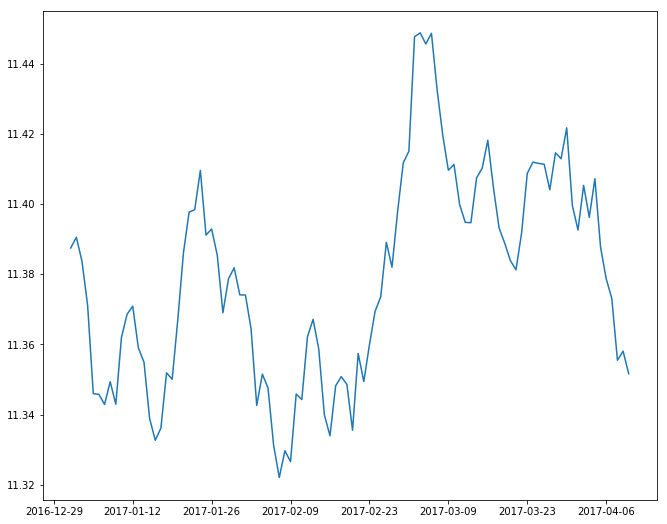

In [263]:
ts_log = np.log(sessionsDf.sessions)
plt.plot(ts_log)

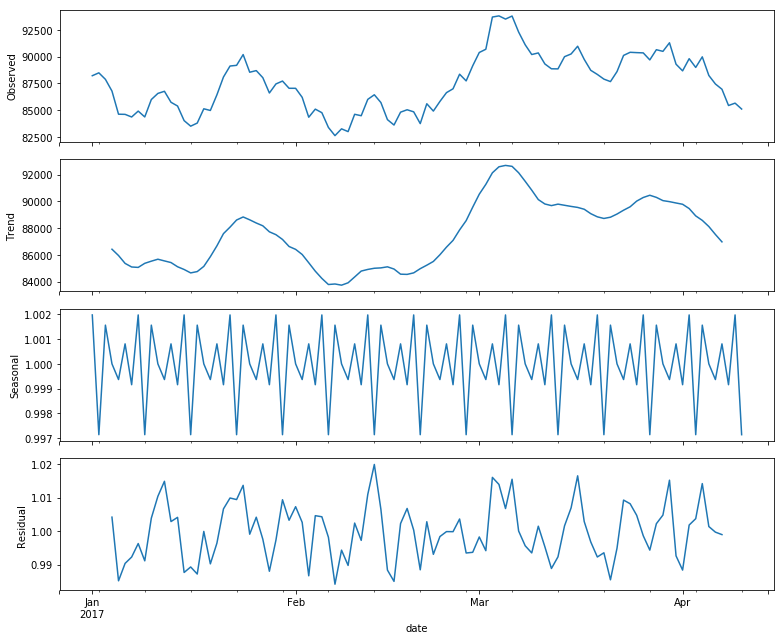

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


result = seasonal_decompose(sessionsDf, model='multiplicative')

result.plot()
plt.show()



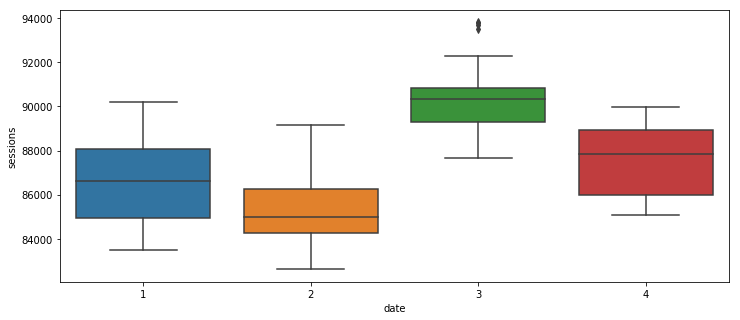

In [209]:


import seaborn


fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(sessionsDf.index.month, sessionsDf.sessions, ax=ax)

For time series decomposition, we use log transformation to reduce trend and applied the time series in decomposition. Then we can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability in the middle of each month.<br>


Based on boxplot in each month, we can see January, Feburary and April get the similar range (from min to max). But March is abnormally getting high range, it also has some anomalies outside of range.

Due to data quantity limitation, we assume it's a stable time series first, then we can apply ARIMA time series model with the dataset.



**2.Data Modeling**

In [281]:

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast(steps=60)[0]
    return model_fit,prediction


model_fit,forecast=StartARIMAForecasting(ts_log,1,0,1)

rmse = sqrt(mean_squared_error(ts_log, model_fit.fittedvalues))
print('Test RSS: %.3f' % sum((model_fit.fittedvalues-ts_log)**2))

Test RSS: 0.012


/Users/YiChen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/YiChen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/YiChen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'residual sum of squares (RSS): 0.0123')

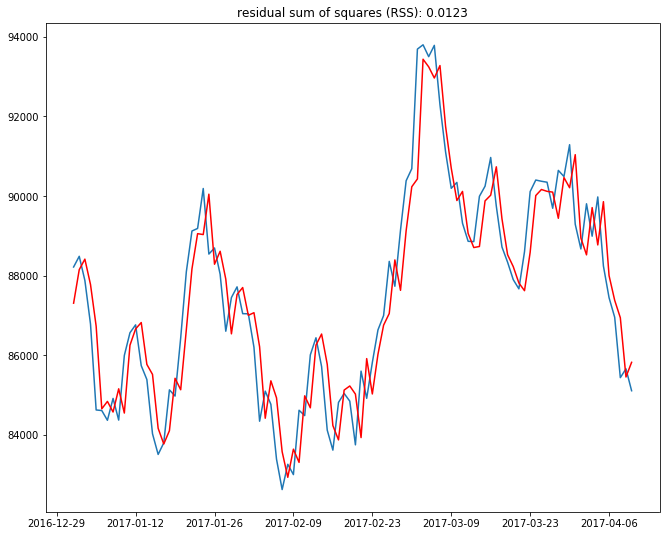

In [299]:

plt.plot(sessionsDf.sessions)
plt.plot(np.exp(model_fit.fittedvalues), color='red')
plt.title('residual sum of squares (RSS): %.4f'% sum((model_fit.fittedvalues-np.log(sessionsDf.sessions))**2))
# plt.title('RMSE: %.4f'% sqrt(mean_squared_error(np.log(sessionsDf.sessions), model_fit.fittedvalues)))

We used ARIMA model to forcast time series. There are 3 predictor we can tune in the model, p, d, q. And based on RSS (residual sum of squares), which is the metric of regression model, we got 0.012 RSS value in p=1,d=0,q=1, which means the error rate of the model is really low<br>
We also plotte the time series comparision between actual value and model value. The model is slightly moving forward than the actual value, but it learn the actual scale very well.

**3. Forcasting the next sixty days**

In [283]:
history_last=sessionsDf.index[-1]

new_session=[]

for yhat in forecast:

    history_last+=timedelta(days=1) 
#     print('Day',history_last,':' ,np.exp(yhat))
    row=(history_last,np.exp(yhat))
    new_session.append(row)
labels = ['date','sessions']
df_new_session = pd.DataFrame.from_records(new_session, columns=labels)
df_new_session.set_index('date', inplace=True)

In [296]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
def plotTimeSeries(series, new,window, plot_intervals=False, scale=1.96):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()
    rolling_new_mean = new.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Time series(history+forcast)")
    plt.plot(new, label="Forecast")


    plt.grid(True)

    plt.plot(series, label="History")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond ")
        plt.plot(lower_bond, "r--", label="Lower Bond ")

        mae = mean_absolute_error(new[window:], rolling_new_mean[window:])
        deviation = np.std(new[window:] - rolling_new_mean[window:])
        lower_bond = rolling_new_mean - (mae + scale * deviation)
        upper_bond = rolling_new_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--")
        plt.plot(lower_bond, "r--")

        

    plt.legend(loc="upper left")


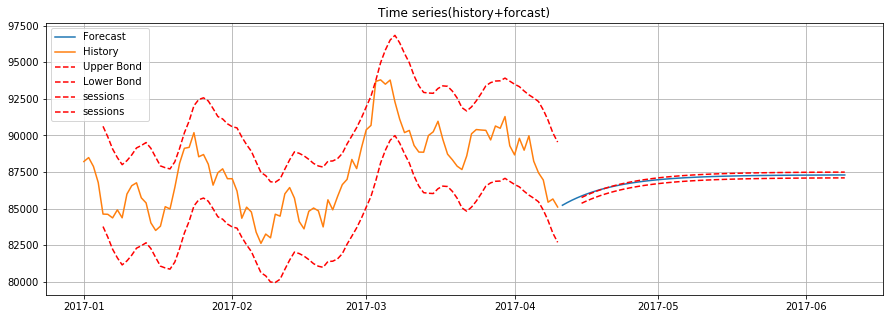

In [297]:
plotTimeSeries(sessionsDf.sessions,df_new_session.sessions, 5, plot_intervals=True)

Based on the prediction result, although it's not getting the similar shape from history data, it's still in 95% confidence interval.

**4.Next Step**<br>
1.Getting more historical data: We can find out more accurate sesson effect and trend if getting at least one year time series data
2.Stable issue: If the dataset is not stable, we need to try more ways to transform the dataset, which make it more stable.

## Question Five: Data Analysis

The internet startup ShinyFancyObjects is looking to make its IPO in the next couple months.  Before doing so, its founders are presenting their company to potential investors and analysts with the goal of generating a higher company valuation before going public.  As a Data Scientist at one of these investment firms, you have been asked to help evaluate ShinyFancyObjects and determine if it would be a good investment.  

You have been provided two resources to help with your analysis; a company fact sheet provided by ShinyFancyObjects, and a table containing data about their customer history.  Using these two pieces of information, determine if this company would be a good long-term investment, and explain why or why not.


**ShinyFancyObjects Fact Sheet; The Hottest Startup Since Facebook**

* ShinyFancyObjects posses a customer file of nearly twenty thousand unique customers.  
* Since its launch in January 2016, ShinyFancyObjects is growing its customer base by 10%.
* There was a new feature release in November of 2016, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month.  
* The company predicts it will more than double its customer base in the next year.  
* The January 2017 gain for new customers was a 120% improvement over of January of 2016. 
* Since January of 2016, ShinyFancyObjects has grown its customer base by 1,841%.
* ShinyFancyObjects boasts a customer retention rate of 58%.  

**Customer History**

This table shows new customers acquired by month, along with how many of those same customers remained active in the following months.  As an example, in January 2016, 1,098 new customers were acquired.  One month later, out of the initial 1,098, only 875 were still active, two months later, 800 were active, and so on.  Whereas in February of 2016, 1,358 new customers were acquired, of which 500 were still active six months after. 

| Cohort | Month 0 | Month 1  | Month 2 | Month 3 | Month 4 | Month 5 | Month 6 | Month 7 | Month 8 | Month 9 | Month 10 | Month 11 | Month 12 | Month 13 | 
|--------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|----------| 
| Jan-16 | 1098    | 875      | 800     | 765     | 552     | 421     | 403     | 382     | 367     | 341     | 295      | 244      | 201      | 185      | 
| Feb-16 | 1358    | 1019     | 996     | 826     | 713     | 524     | 500     | 495     | 389     | 301     | 257      | 178      | 133      |          | 
| Mar-16 | 1257    | 892      | 741     | 705     | 648     | 498     | 395     | 205     | 168     | 132     | 121      | 84       |          |          | 
| Apr-16 | 1587    | 1174     | 924     | 838     | 699     | 354     | 205     | 158     | 104     | 79      | 55       |          |          |          | 
| May-16 | 1758    | 1213     | 1000    | 751     | 605     | 305     | 165     | 111     | 90      | 65      |          |          |          |          | 
| Jun-16 | 1624    | 1137     | 954     | 754     | 403     | 248     | 205     | 165     | 100     |         |          |          |          |          | 
| Jul-16 | 1541    | 1002     | 874     | 621     | 322     | 201     | 168     | 105     |         |         |          |          |          |          | 
| Aug-16 | 868     | 521      | 499     | 400     | 158     | 118     | 75      |         |         |         |          |          |          |          | 
| Sep-16 | 1143    | 629      | 451     | 384     | 205     | 100     |         |         |         |         |          |          |          |          | 
| Oct-16 | 1253    | 639      | 338     | 255     | 117     |         |         |         |         |         |          |          |          |          | 
| Nov-16 | 1835    | 899      | 241     | 107     |         |         |         |         |         |         |          |          |          |          | 
| Dec-16 | 2155    | 862      | 205     |         |         |         |         |         |         |         |          |          |          |          | 
| Jan-17 | 2422    | 848      |         |         |         |         |         |         |         |         |          |          |          |          | 
| Feb-17 | 2531    |          |         |         |         |         |         |         |         |         |          |          |          |          | 

*Bonus Question:* What other data sources would be helpful in making your recommendation? 

Based on the fact sheet, ShinyFancyObjects is growing very fast, including total customer growing rate and total customer retention rate.
However, regarding the following two analysis perspective, I strongly disagree to invest ShinyFancyObjects at this time.

**1.Retention Rate<br>**
Although the fact sheet said ShinyFancyObjects boasts a customer retention rate of 58%, it only calculated by total customer in Month 1 divied by total customer in Month 0.
However, if we see the rentention rate in each joined month for one month period, there's obvious a  decreasing trend in the following plot:
<img src="picture/period_1.png">

The retention rate can be retained on over 70% from 01/16 to 05/16. But it start decreasing from 70% to 35% after 05/16. The retention rate is still decreasing even the new feature releasing in 11/16.<br>

Here's the summary of rentention rate by each period and joined month:
<img src="picture/total.png">

Obviously, the slope of retention rate is severe decreasing stated from 2 month later, which means most of customers aren't active after they joined 2 month.

We can use another metric to define the declining rate in each period: slope<br>
1.We assume each line is linear regression<br>
2.We can get the trendline and slope analyzed by excel<br>
3.We plot each slope on line chart<br>
<img src="picture/slope.png">

We can observed that the slope has a significant drop from 2 month later to 7 month later. Another severe decreasing of slope is from 8 month later to 12 month later, which means ShinyFancyObjects does not have a true loyal customer base. Most of the customers exit the service after one month.

In conclusion, it looks like ShinyFancyObjects can't retain customer in long term. The reason might be customer can't get a good real connection with their group. Therefore, we need to collect other data sources then figure out what's the main reason of retaining customer first before doing the investment. 


**2.New feature release<br>**
The fact sheet said the new feature release in November of 2016 causes 46% increase in new customers from the prior month. This statement is true only when we look at the retention rate change on a short-term period. (From Sep-Oct and Oct-Nov)
<img src="picture/short_term.png">

Overall, the retention rate from Sep-Oct to Oct-Nove is increasing, which proves the new feature release successfully catch customer's eyes.

However,the influence of new feature doesn't keep a long time after we check retention rate change in long term plot
<img src="picture/long.png">
It looks like the new feature only has short-term influence on customers, the longest we observed is those who joined in September 2016, but still last two months only. The reason that retention rate of customer joined in October is suddenly increasing in Dec-Jan 2017 period is that the total number of customer in month 2 and month 3 are too low, where it only has 338 and 255. In my opinoin, the retention rate can't be a good metric at this time when sample number is lower than 350.
In addition, in the time frame of one month after the release of new feature, the retention rate of customers joined in Dec 2016 and Jan 2017 is severe dropping down.

In conclusion, the release of new feature sure could catch customer's eyes in a short period of time, but it doesn't help to keep customer's interest after one month. Therefore, new feature still fails to maitain a good retention rate. We still don't understand the compeititve advantage of the product nor the core user from the addition of the feature. 

**Summary** <br>
ShinyFancyObjects still needs to figure out how to strenthen their brand loyalty and retain their customer base in long-term basis. Based on the findings, I do not recommend to invest ShinyFancyObjects at this time. 

#Bonus Question: What other data sources would be helpful in making your recommendation?

1.Customer background<br>
We can find out what kind of specific customer group is highly active in ShinyFancyObjects and explore more similiar customer groups based on some recommendation systems like collaborative filtering.

2.More detail for new Feature<br>
We can explore the reason why most of the customers are not interested in new feature in long-term. And what might be the focus group for the new feature.